In [1]:
import xarray as xr

In [2]:
dnc_all = ["/home/rfrost/simulations/nc/full_step_6/576000_1152000_stats.nc",
           "/home/rfrost/simulations/nc/full_step_9/576000_1152000_stats.nc", 
           "/home/rfrost/simulations/nc/full_step_12/576000_1152000_stats.nc",
           "/home/rfrost/simulations/nc/full_step_15/576000_1152000_stats.nc"]

s_all = []
for dnc in dnc_all:
    s = xr.open_dataset(dnc)
    s_all.append(s)

In [3]:
for i, s in enumerate(s_all):
    idx = s.theta_mean.differentiate(coord="z").argmax(axis=1)
    s["zi_tgrad"] = s.z[idx]

In [4]:
import matplotlib.pyplot as plt

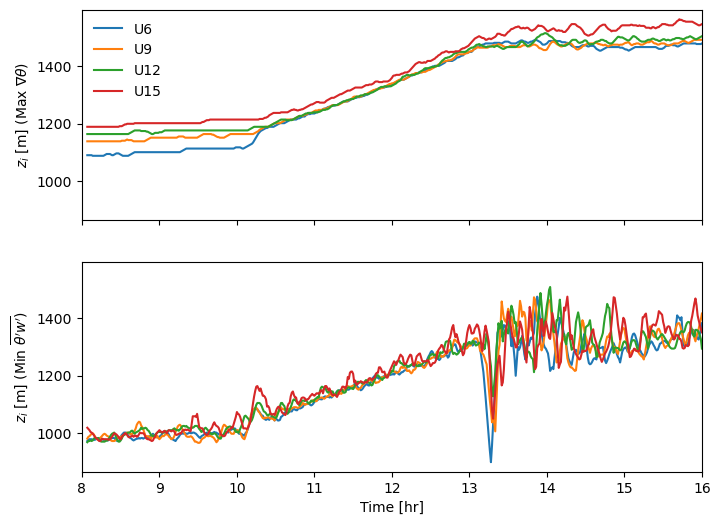

In [16]:
fig, ax = plt.subplots(figsize=(8,6), nrows=2, sharey=True, sharex=True)

ug_list = [6,9,12,15]

for i, s in enumerate(s_all):
    ax[0].plot(s.time / 3600 + 8, s.zi_tgrad.rolling(time=6).mean(), label=f"U{ug_list[i]}")
    ax[1].plot(s.time / 3600 + 8, s.zi.rolling(time=6).mean(), label=f"U{ug_list[i]}")

ax[0].set_xlim(8,16)
ax[0].set_ylabel("$z_i$ [m] (Max $\\nabla \\theta$)")
ax[1].set_ylabel("$z_i$ [m] (Min $\overline{\\theta' w'}$)")
ax[1].set_xlabel("Time [hr]")

ax[0].legend(frameon=False)

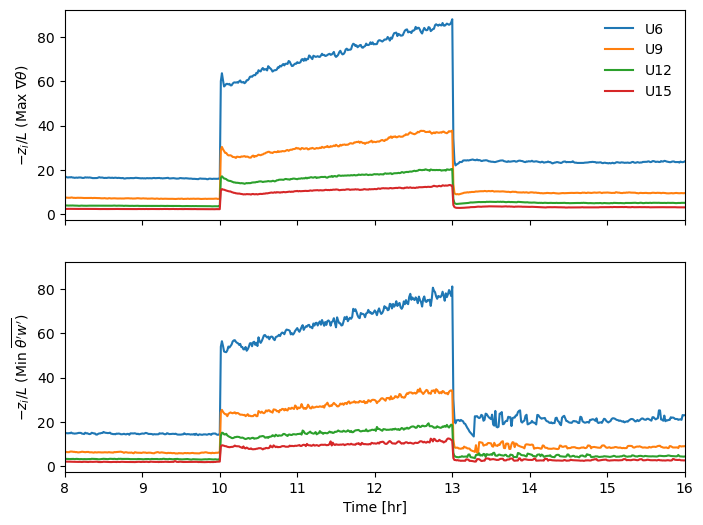

In [17]:
fig, ax = plt.subplots(figsize=(8,6), nrows=2, sharey=True, sharex=True)

ug_list = [6,9,12,15]

for i, s in enumerate(s_all):
    ax[0].plot(s.time / 3600 + 8, -s.zi_tgrad / s.L, label=f"U{ug_list[i]}")
    ax[1].plot(s.time / 3600 + 8, -s.zi / s.L, label=f"U{ug_list[i]}")

ax[0].set_xlim(8,16)
ax[0].set_ylabel("$- z_i / L$ (Max $\\nabla \\theta$)")
ax[1].set_ylabel("$- z_i / L$ (Min $\overline{\\theta' w'}$)")
ax[1].set_xlabel("Time [hr]")

ax[0].legend(frameon=False)